<a href="https://colab.research.google.com/github/ratimayy/ML/blob/main/ML_6610422001_as_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4380    0  4380    0     0   9714      0 --:--:-- --:--:-- --:--:--  9733
100  517k  100  517k    0     0   441k      0  0:00:01  0:00:01 --:--:--  818k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4404    0  4404    0     0  15416      0 --:--:-- --:--:-- --:--:-- 15398
100  392k  100  392k    0     0   251k      0  0:00:01  0:00:01 --:--:--  582k


In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
df = yf.Ticker('AMZN')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = df.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,85.459999,86.959999,84.480003,84.870399,18912072,0.0,0.0
2023-01-03 10:30:00-05:00,84.879997,85.500000,84.561897,85.008400,7146381,0.0,0.0
2023-01-03 11:30:00-05:00,85.000504,85.019997,84.209999,84.410004,4802151,0.0,0.0
2023-01-03 12:30:00-05:00,84.415001,84.964996,84.205002,84.919998,4072132,0.0,0.0
2023-01-03 13:30:00-05:00,84.930000,85.510002,84.879997,85.445000,4349226,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,151.550003,152.119995,151.029999,151.524094,4300997,0.0,0.0
2023-12-29 12:30:00-05:00,151.524994,152.600006,151.500000,152.284393,3020239,0.0,0.0
2023-12-29 13:30:00-05:00,152.295593,152.550003,152.240005,152.336105,2173177,0.0,0.0


In [ ]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,83.982498,84.269997,83.750000,83.769997,5065515,0.0,0.0,84.526220,0.720018
2023-01-05 14:30:00-05:00,83.766998,84.209999,83.389999,83.535599,6852064,0.0,0.0,84.302280,0.755773
2023-01-05 15:30:00-05:00,83.529999,83.580002,83.070000,83.110001,7095030,0.0,0.0,84.022290,0.829993
2023-01-06 09:30:00-05:00,82.250000,83.519997,81.430000,82.940102,22488879,0.0,0.0,83.857290,0.851946
2023-01-06 10:30:00-05:00,82.949997,84.394997,82.870102,84.035004,12214051,0.0,0.0,83.756770,0.615053
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,151.550003,152.119995,151.029999,151.524094,4300997,0.0,0.0,153.174422,0.916219
2023-12-29 12:30:00-05:00,151.524994,152.600006,151.500000,152.284393,3020239,0.0,0.0,153.055360,0.805989
2023-12-29 13:30:00-05:00,152.295593,152.550003,152.240005,152.336105,2173177,0.0,0.0,152.953970,0.747430


In [ ]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,83.982498,84.269997,83.750000,83.769997,5065515,0.0,0.0,84.526220,0.720018
2023-01-05 14:30:00-05:00,83.766998,84.209999,83.389999,83.535599,6852064,0.0,0.0,84.302280,0.755773
2023-01-05 15:30:00-05:00,83.529999,83.580002,83.070000,83.110001,7095030,0.0,0.0,84.022290,0.829993
2023-01-06 09:30:00-05:00,82.250000,83.519997,81.430000,82.940102,22488879,0.0,0.0,83.857290,0.851946
2023-01-06 10:30:00-05:00,82.949997,84.394997,82.870102,84.035004,12214051,0.0,0.0,83.756770,0.615053
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,151.550003,152.119995,151.029999,151.524094,4300997,0.0,0.0,153.174422,0.916219
2023-12-29 12:30:00-05:00,151.524994,152.600006,151.500000,152.284393,3020239,0.0,0.0,153.055360,0.805989
2023-12-29 13:30:00-05:00,152.295593,152.550003,152.240005,152.336105,2173177,0.0,0.0,152.953970,0.747430


In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
print(y[:20])
print(y)

[-1 -1 -1  1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1]
[-1 -1 -1 ... -1 -1 -1]


In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

model


LogisticRegression()

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[4.152779722276788e-13]
1,High,[4.172138189784433e-13]
2,Low,[4.1429516939710545e-13]
3,Close,[4.155535350080844e-13]
4,Volume,[1.7254670313973976e-08]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_10,[4.189893547545862e-13]
8,Corr,[2.318934749280811e-15]


In [ ]:
probability = model.predict_proba(X_test)
print(probability)


[[0.48288115 0.51711885]
 [0.48164477 0.51835523]
 [0.47257999 0.52742001]
 ...
 [0.49062674 0.50937326]
 [0.48519058 0.51480942]
 [0.47563976 0.52436024]]


If you print the ‘predicted’ variable, you will observe that the classifier is predicting 1, when the probability in the second column of variable ‘probability’ is greater than 0.5. When the probability in the second column is less than 0.5, then the classifier will be predicting -1.


the signal shows 1, which is a buy signal

In [ ]:
X_test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr
Datetime,,,,,,,,,
2023-09-14 12:30:00-04:00,144.960007,145.325500,144.490005,145.220001,3970065,0.0,0.0,144.573119,0.879469
2023-09-14 13:30:00-04:00,145.229996,145.649994,145.210007,145.445007,4257046,0.0,0.0,144.706340,0.887214
2023-09-14 14:30:00-04:00,145.440002,145.860001,145.205002,145.229904,6362927,0.0,0.0,144.798331,0.904650
2023-09-14 15:30:00-04:00,145.220001,145.279999,144.520004,144.690002,6893332,0.0,0.0,144.842491,0.756368
2023-09-15 09:30:00-04:00,142.690002,143.570007,140.787994,141.050003,26502393,0.0,0.0,144.502492,0.041435
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,151.550003,152.119995,151.029999,151.524094,4300997,0.0,0.0,153.174422,0.916219
2023-12-29 12:30:00-05:00,151.524994,152.600006,151.500000,152.284393,3020239,0.0,0.0,153.055360,0.805989
2023-12-29 13:30:00-05:00,152.295593,152.550003,152.240005,152.336105,2173177,0.0,0.0,152.953970,0.747430


In [ ]:
predicted = model.predict(X_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
predicted_labels = model.predict(X_test)
test_dates = df.index[split:]

print(predicted_labels)
print(test_dates)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates = test_dates[predicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2023-09-14 12:30:00-04:00', '2023-09-14 13:30:00-04:00',
               '2023-09-14 14:30:00-04:00', '2023-09-14 15:30:00-04:00',
               '2023-09-15 09:30:00-04:00', '2023-09-15 10:30:00-04:00',
               '2023-09-15 11:30:00-04:00', '2023-09-15 12:30:00-04:00',
               '2023-09-15 13:30:00-04:00', '2023-09-15 14:30:00-04:00',
               ...
               '2023-12-28 13:30:00-05:00', '2023-12-28 14:30:00-05:00',
               '2023-12-28 15:30:00-05:00', '2023-12-29 09:30:00-05:00',
               '2023-12-29 10:30:00-05:00', '2023-12-29 11:30:00-05:00',
               '2023-12-29 12:30:00-05:00', '2023-12-29 13:30:00-05:00',
               '2023-12-29 14:30:00-05:00', '2023-12-29 15:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=518, freq=None)


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))


[[  0 239]
 [  0 279]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       239
           1       0.54      1.00      0.70       279

    accuracy                           0.54       518
   macro avg       0.27      0.50      0.35       518
weighted avg       0.29      0.54      0.38       518



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(model.score(X_test,y_test))

0.5386100386100386


In [ ]:
cross_val = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.5433526  0.5433526  0.5433526  0.5433526  0.54069767 0.54069767
 0.54069767 0.54069767 0.54651163 0.54651163]
0.542922435811265


<ipython-input-72-dc0384edc0d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-72-dc0384edc0d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stock_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-72-dc0384edc0d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

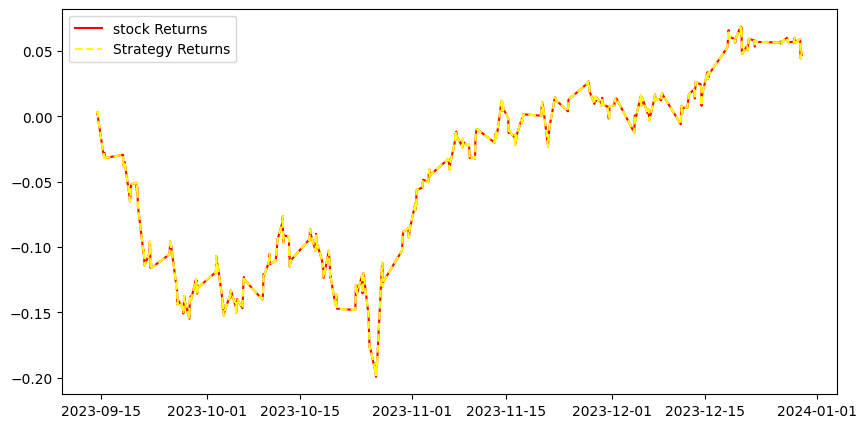

In [ ]:
df['Predicted_Signal'] = model.predict(X)
df['stock_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_stock_returns = np.cumsum(df[split:]['stock_returns'])


df['Strategy_returns'] = df['stock_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_stock_returns, color='r', label='stock Returns')
plt.plot(Cumulative_Strategy_returns, color='yellow', label='Strategy Returns', linestyle='--')

plt.legend()
plt.show()

In [ ]:
stock = df.copy()
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI,Open-Close,Open-Open,Predicted_Signal,stock_returns,Strategy_returns
Datetime,,,,,,,,,,,,,,,
2023-01-05 13:30:00-05:00,83.982498,84.269997,83.750000,83.769997,5065515,0.0,0.0,84.526220,0.720018,42.698034,0.000496,0.216301,1,NaN,NaN
2023-01-05 14:30:00-05:00,83.766998,84.209999,83.389999,83.535599,6852064,0.0,0.0,84.302280,0.755773,40.725062,-0.002998,-0.215500,1,-0.002802,-0.002802
2023-01-05 15:30:00-05:00,83.529999,83.580002,83.070000,83.110001,7095030,0.0,0.0,84.022290,0.829993,37.252340,-0.005600,-0.237000,1,-0.005108,-0.005108
2023-01-06 09:30:00-05:00,82.250000,83.519997,81.430000,82.940102,22488879,0.0,0.0,83.857290,0.851946,35.894692,-0.860001,-1.279999,1,-0.002046,-0.002046
2023-01-06 10:30:00-05:00,82.949997,84.394997,82.870102,84.035004,12214051,0.0,0.0,83.756770,0.615053,49.161544,0.009895,0.699997,1,0.013115,0.013115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,151.550003,152.119995,151.029999,151.524094,4300997,0.0,0.0,153.174422,0.916219,26.986301,0.000000,-2.239990,1,-0.000171,-0.000171
2023-12-29 12:30:00-05:00,151.524994,152.600006,151.500000,152.284393,3020239,0.0,0.0,153.055360,0.805989,39.893352,0.000900,-0.025009,1,0.005005,0.005005
2023-12-29 13:30:00-05:00,152.295593,152.550003,152.240005,152.336105,2173177,0.0,0.0,152.953970,0.747430,40.685755,0.011200,0.770599,1,0.000340,0.000340


In [ ]:
ind = yf.Ticker('^NDX')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
ind = ind.history(interval=interval,start=start,end=end)
ind

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,11031.634766,11092.044922,10849.333984,10861.505859,0,0.0,0.0
2023-01-03 10:30:00-05:00,10856.330078,10901.712891,10817.180664,10834.069336,139068280,0.0,0.0
2023-01-03 11:30:00-05:00,10833.132812,10833.132812,10778.954102,10794.881836,111608453,0.0,0.0
2023-01-03 12:30:00-05:00,10794.948242,10824.410156,10770.957031,10820.927734,89229087,0.0,0.0
2023-01-03 13:30:00-05:00,10821.043945,10846.152344,10808.379883,10824.702148,82454276,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,16758.480469,16803.457031,16757.945312,16765.343750,63628604,0.0,0.0
2023-12-29 12:30:00-05:00,16765.691406,16833.658203,16764.945312,16813.761719,57014332,0.0,0.0
2023-12-29 13:30:00-05:00,16813.773438,16847.658203,16813.150391,16831.337891,53107789,0.0,0.0


In [ ]:
ind['S_10'] = ind['Close'].rolling(window=10).mean()
ind['Corr'] = ind['Close'].rolling(window=10).corr(ind['S_10'])
ind['RSI'] = ta.RSI(np.array(ind['Close']), timeperiod =10)
ind['Open-Close'] = ind['Open'] - ind['Close'].shift(1)
ind['Open-Open'] = ind['Open'] - ind['Open'].shift(1)

#add more indicators
# Moving Average (MA)
ind['MA_50'] = ind['Close'].rolling(window=50).mean()

# Moving Average Convergence Divergence (MACD)
macd, signal, hist = ta.MACD(np.array(ind['Close']), fastperiod=12, slowperiod=26, signalperiod=9)
ind['MACD'] = macd
ind['MACD_Signal'] = signal
ind['MACD_Hist'] = hist

# Bollinger Bands
ind['MA_20'] = ind['Close'].rolling(window=20).mean()
ind['std_20'] = ind['Close'].rolling(window=20).std()
ind['Upper_BB'] = ind['MA_20'] + 2 * ind['std_20']
ind['Lower_BB'] = ind['MA_20'] - 2 * ind['std_20']

# Wave Trend Momentum Oscillator
ind['WTMO'] = ind['Close'] - ind['Close'].shift(10)

ind = ind.dropna()

Xind = ind
Xind


,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI,...,Open-Open,MA_50,MACD,MACD_Signal,MACD_Hist,MA_20,std_20,Upper_BB,Lower_BB,WTMO
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-12 09:30:00-05:00,11437.703125,11443.269531,11246.585938,11398.832031,0,0.0,0.0,11314.319434,0.843717,76.065347,...,73.550781,11034.444219,99.385962,88.898550,10.487412,11244.274219,100.648918,11445.572055,11042.976382,212.262695
2023-01-12 10:30:00-05:00,11398.250000,11427.791992,11324.212891,11380.489258,128914109,0.0,0.0,11335.817383,0.859808,71.444672,...,-39.453125,11044.823887,98.175104,90.753861,7.421243,11248.823193,104.772513,11458.368219,11039.278168,214.979492
2023-01-12 11:30:00-05:00,11380.663086,11470.938477,11352.910156,11469.516602,100481379,0.0,0.0,11362.285547,0.922172,78.490900,...,-17.586914,11057.532832,103.209517,93.244992,9.964525,11258.256787,115.728506,11489.713800,11026.799774,264.681641
2023-01-12 12:30:00-05:00,11469.402344,11487.353516,11408.356445,11410.249023,101063239,0.0,0.0,11372.243457,0.904169,66.375717,...,88.739258,11069.840176,101.249784,94.845951,6.403833,11267.699316,120.181558,11508.062433,11027.336200,99.579102
2023-01-12 13:30:00-05:00,11409.538086,11499.588867,11387.277344,11465.017578,104166707,0.0,0.0,11389.307520,0.898830,70.975588,...,-59.864258,11082.721973,102.929538,96.462668,6.466870,11284.041504,123.809028,11531.659560,11036.423448,170.640625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,16758.480469,16803.457031,16757.945312,16765.343750,63628604,0.0,0.0,16890.880859,0.392848,28.905201,...,-147.968750,16816.052930,8.798451,30.889579,-22.091128,16889.835449,48.789936,16987.415322,16792.255576,-144.978516
2023-12-29 12:30:00-05:00,16765.691406,16833.658203,16764.945312,16813.761719,57014332,0.0,0.0,16878.211133,0.589447,40.789712,...,7.210938,16816.854297,3.961976,25.504058,-21.542083,16887.484961,51.330048,16990.145057,16784.824865,-126.697266
2023-12-29 13:30:00-05:00,16813.773438,16847.658203,16813.150391,16831.337891,53107789,0.0,0.0,16868.676563,0.601474,44.529773,...,48.082031,16817.907422,1.529651,20.709177,-19.179525,16884.130957,52.749995,16989.630948,16778.630966,-95.345703


In [ ]:
yind = np.where(ind['Close'].shift(-1) > ind['Close'],1,-1)
print(yind[:20])
print(yind)

[-1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1 -1  1 -1]
[-1  1 -1 ...  1 -1 -1]


In [ ]:
split = int(0.7*len(df))
xind_train, xind_test, yind_train, yind_test = Xind[:split], Xind[split:], yind[:split], yind[split:]

In [ ]:
modelind = LogisticRegression(max_iter = 1000)
modelind = modelind.fit (xind_train,yind_train)

In [ ]:
pd.DataFrame(zip(ind.columns, np.transpose(modelind.coef_)))

,0,1
0,Open,[3.985839794100723e-13]
1,High,[4.011313104517939e-13]
2,Low,[3.999395665387717e-13]
3,Close,[4.014078109510732e-13]
4,Volume,[1.4117952107016698e-09]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_10,[3.969160087675724e-13]
8,Corr,[3.997571792418422e-17]
9,RSI,[1.518835872551531e-15]


In [ ]:
probability_ind = modelind.predict_proba(xind_test)
probability_ind

array([[0.45995664, 0.54004336],
       [0.49999999, 0.50000001],
       [0.45808105, 0.54191895],
       [0.47115849, 0.52884151],
       [0.47086833, 0.52913167],
       [0.47563654, 0.52436346],
       [0.46289832, 0.53710168],
       [0.46604673, 0.53395327],
       [0.49999999, 0.50000001],
       [0.46119924, 0.53880076],
       [0.47341933, 0.52658067],
       [0.47557271, 0.52442729],
       [0.47024551, 0.52975449],
       [0.47098835, 0.52901165],
       [0.47225151, 0.52774849],
       [0.49999999, 0.50000001],
       [0.46652051, 0.53347949],
       [0.4756376 , 0.5243624 ],
       [0.47886526, 0.52113474],
       [0.48020734, 0.51979266],
       [0.47550267, 0.52449733],
       [0.47658395, 0.52341605],
       [0.49999999, 0.50000001],
       [0.45943668, 0.54056332],
       [0.47091362, 0.52908638],
       [0.47668581, 0.52331419],
       [0.4725922 , 0.5274078 ],
       [0.4655854 , 0.5344146 ],
       [0.46720102, 0.53279898],
       [0.49999999, 0.50000001],
       [0.

In [ ]:
predicted_ind = modelind.predict(xind_test)
predicted_ind

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print(metrics.classification_report(yind_test,predicted_ind))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       223
           1       0.54      1.00      0.70       264

    accuracy                           0.54       487
   macro avg       0.27      0.50      0.35       487
weighted avg       0.29      0.54      0.38       487



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.confusion_matrix(yind_test, predicted_ind))

[[  0 223]
 [  0 264]]


In [ ]:
print(modelind.score(xind_test,yind_test))

0.5420944558521561


In [ ]:
cross_val_ind = cross_val_score(modelind, Xind, yind, scoring='accuracy', cv=10)
# print(cross_val_ind)
# print(cross_val_ind.mean())

In [ ]:
ind['Predicted_Signal_ind'] = modelind.predict(ind)


<ipython-input-66-801cc6623091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['Predicted_Signal_ind'] = modelind.predict(ind)


<ipython-input-71-7b09845567ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-71-7b09845567ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stock_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-71-7b09845567ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

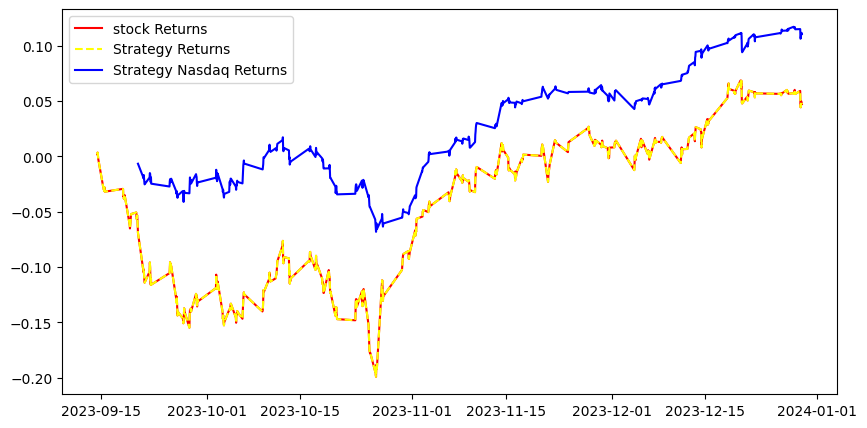

In [ ]:
df['Predicted_Signal'] = model.predict(X)
df['stock_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_stock_returns = np.cumsum(df[split:]['stock_returns'])
df['Strategy_returns'] = df['stock_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

ind['nasdaq_returns'] = np.log(ind['Close']/ind['Close'].shift(1))
Cumulative_nasdaq_returns = np.cumsum(ind[split:]['nasdaq_returns'])
ind['Strategy_nasdaq_returns'] = ind['nasdaq_returns']* ind['Predicted_Signal_ind'].shift(1)
Cumulative_Strategy_nasdaq_returns = np.cumsum(ind[split:]['Strategy_nasdaq_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_stock_returns, color='r', label='stock Returns')
plt.plot(Cumulative_Strategy_returns, color='yellow', label='Strategy Returns', linestyle='--')
plt.plot(Cumulative_Strategy_nasdaq_returns, color='b', label='Strategy Nasdaq Returns')

plt.legend()
plt.show()
